In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("Paired"))
import warnings
# Suppress FutureWarnings from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from scipy.stats import boxcox

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Load and inspect the data

In [2]:
data = pd.read_csv("dataset_savioroftheheart.csv")
data.head()

,Sex,Age,SBP(mmHg),Treatment for Hypertension,Current Smoker,Diabetes,HDL,TCL,Risk Score,Risk Score (%)
0,m,30,90,n,n,y,10,100,0.032416,3.241608
1,m,31,95,y,y,n,15,115,0.046323,4.632346
2,f,31,90,n,y,y,20,130,0.023048,2.304822
3,f,32,95,y,y,n,25,145,0.018608,1.860786
4,m,33,100,n,y,y,30,160,0.061379,6.137861


In [3]:
# check for any missing values
data.isna().sum()

Sex                           0
Age                           0
SBP(mmHg)                     0
Treatment for Hypertension    0
Current Smoker                0
Diabetes                      0
HDL                           0
TCL                           0
Risk Score                    0
Risk Score (%)                0
dtype: int64

In [4]:
# statistical info for alll the numeric columns
data.describe()

,Age,SBP(mmHg),HDL,TCL,Risk Score,Risk Score (%)
count,10115.000000,10115.000000,10115.000000,10115.000000,10115.000000,10115.000000
mean,52.035195,144.325260,54.412358,252.418784,0.284577,28.457680
std,13.058460,32.808286,26.278161,88.201082,0.246664,24.666374
min,30.000000,22.000000,10.000000,100.000000,0.002894,0.289403
25%,41.000000,117.000000,32.000000,177.000000,0.089754,8.975380
50%,52.000000,144.000000,53.000000,250.000000,0.203342,20.334206
75%,63.000000,173.000000,77.000000,329.000000,0.410746,41.074556
max,74.000000,200.000000,100.000000,405.000000,0.999996,99.999595


In [5]:
# changing the column names 
def rem_space(name):
    new_name=[]
    for i in name:
        i=i.replace(" ","_")
        new_name.append(i)
    return new_name
new_colnames = rem_space(data.columns)

In [6]:
data.rename(columns=dict(zip(data.columns,new_colnames)),inplace=True)

# Data visualization

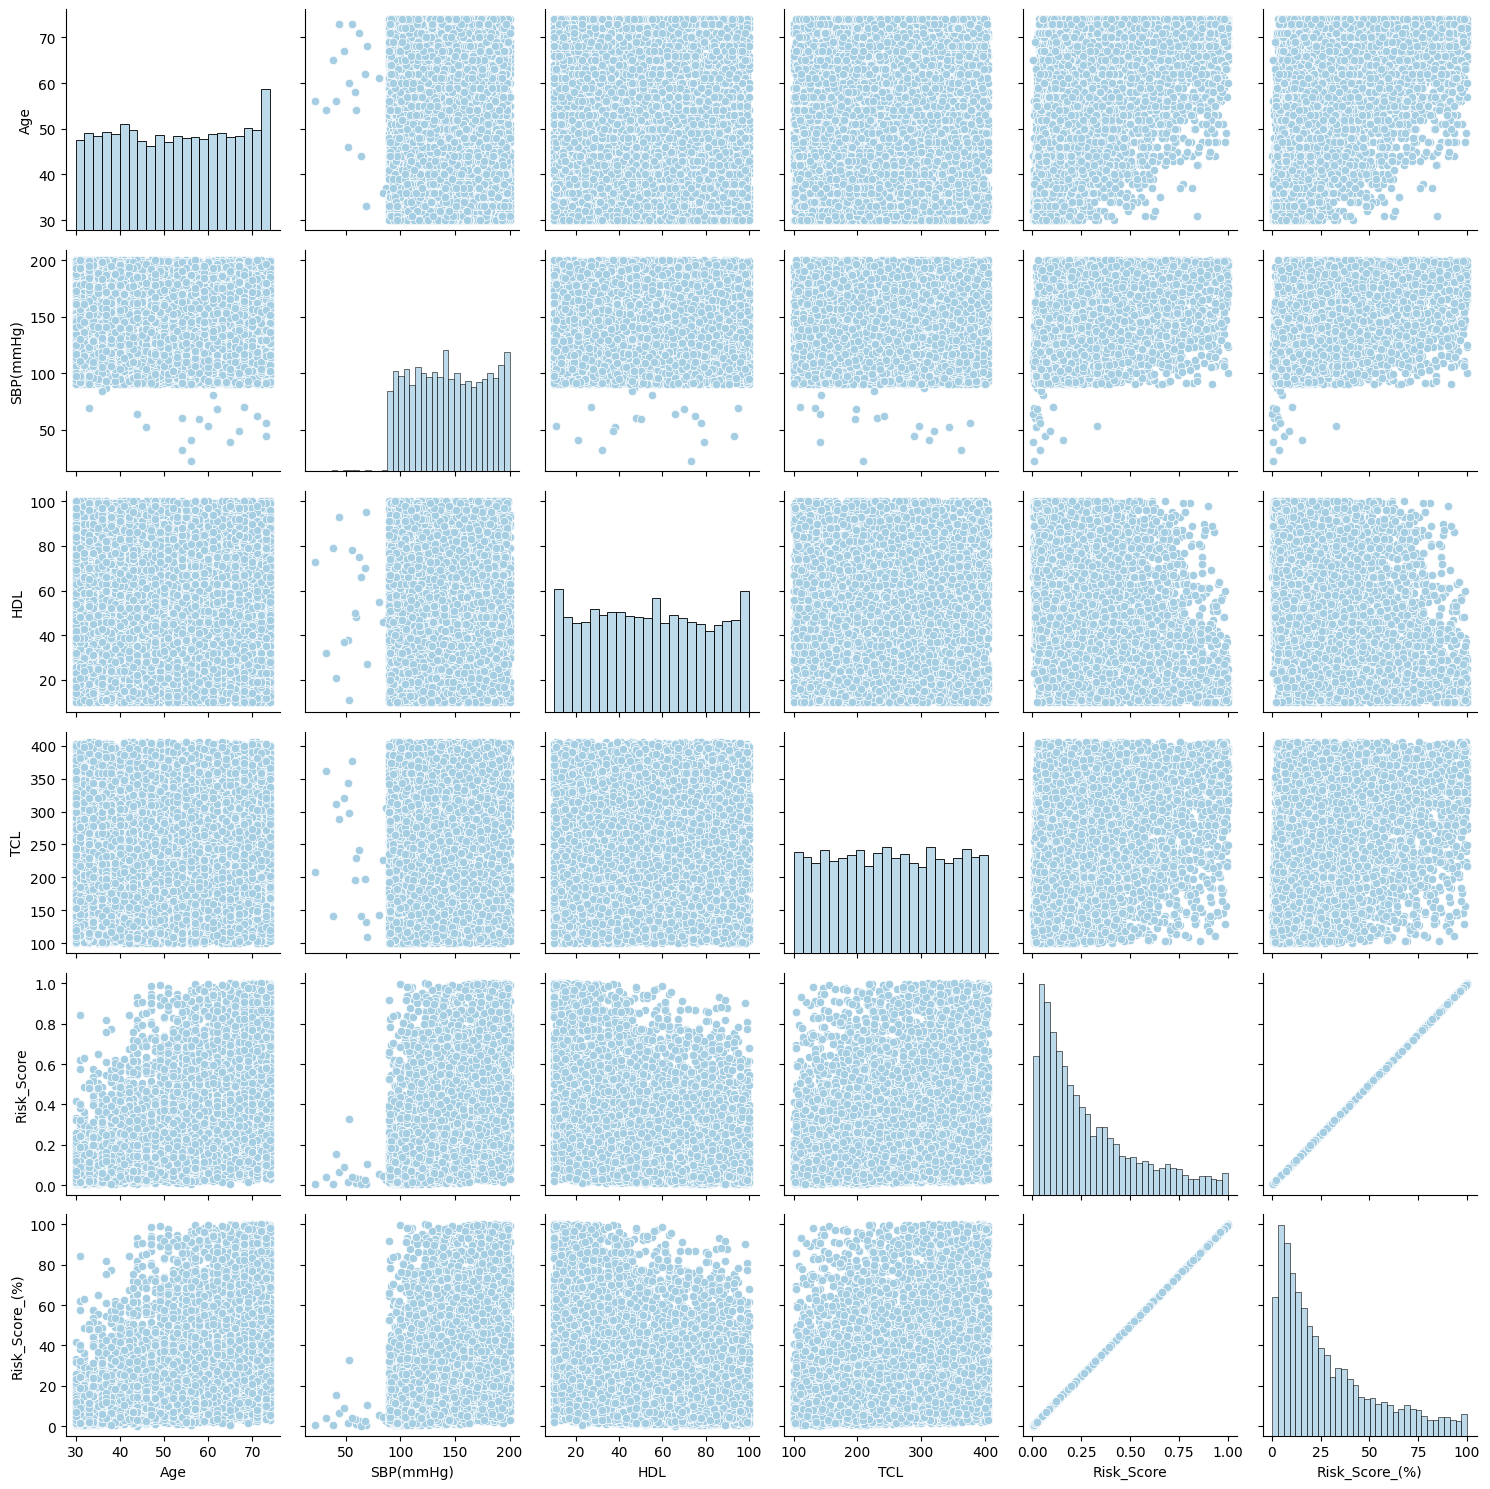

In [7]:
# Distribution of features
sns.pairplot(data)
plt.tight_layout()

In [8]:
data['Risk_Score'].skew()

1.09757205149937

Here, the target variable(Risk score) has a right skewed distribution. We will be performing some sort of transformation to make it normally distributed.

In [9]:
# performing boxcox transformation
data['Risk_Score']=boxcox(data['Risk_Score'])[0]

/tmp/ipykernel_20415/2780138339.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Risk_Score'])


<Axes: xlabel='Risk_Score', ylabel='Density'>

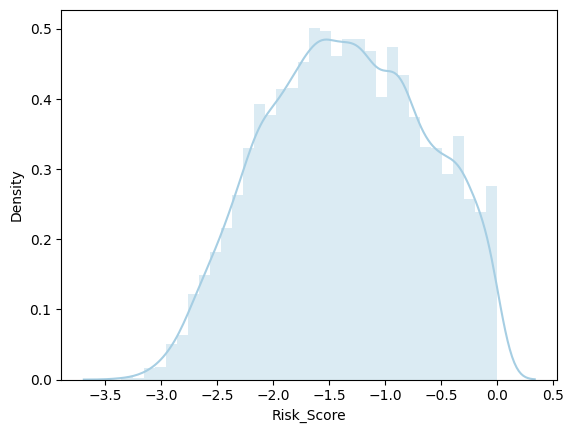

In [10]:
sns.distplot(data['Risk_Score'])

In [11]:
data.drop(data.columns[-1],axis=1,inplace=True)

In [12]:
# checking for the datatypes
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10115 entries, 0 to 10114
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sex                         10115 non-null  object 
 1   Age                         10115 non-null  int64  
 2   SBP(mmHg)                   10115 non-null  int64  
 3   Treatment_for_Hypertension  10115 non-null  object 
 4   Current_Smoker              10115 non-null  object 
 5   Diabetes                    10115 non-null  object 
 6   HDL                         10115 non-null  int64  
 7   TCL                         10115 non-null  int64  
 8   Risk_Score                  10115 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 711.3+ KB


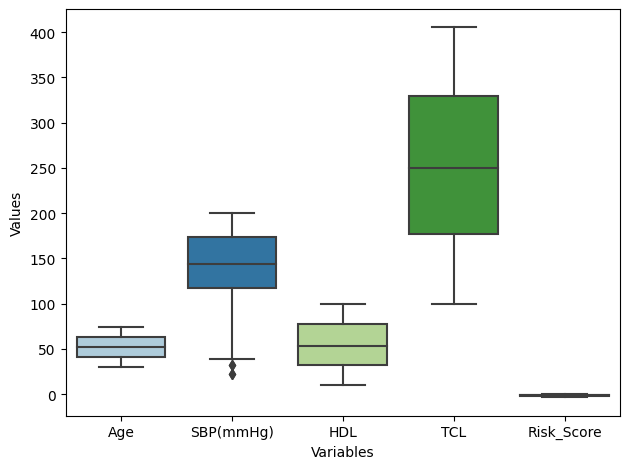

In [13]:
# checking for outliers in the data
sns.boxplot(data)
plt.xlabel("Variables")
plt.ylabel("Values")
plt.tight_layout()


In [14]:
# creating a function to detect outlier in the data
def outlier_detection(dataframe):
  Q1 = dataframe.quantile(0.25)
  Q3 = dataframe.quantile(0.75)
  IQR = Q3 - Q1
  upper_end = Q3 + 1.5 * IQR
  lower_end = Q1 - 1.5 * IQR 
  outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
  return outlier

In [15]:
SBPoutliers = outlier_detection(data['SBP(mmHg)'])

In [16]:
data.drop(SBPoutliers.index,inplace=True)

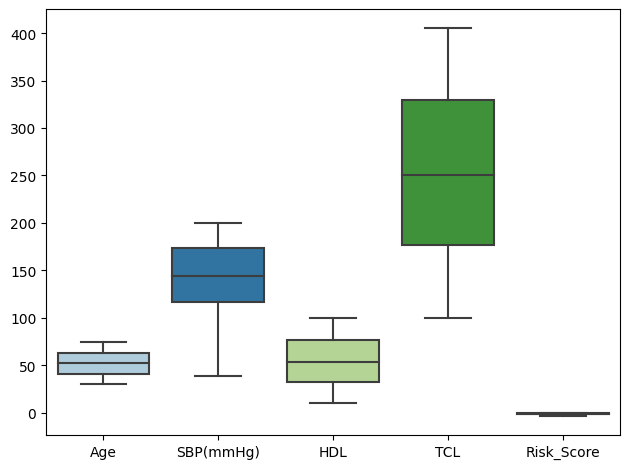

In [17]:
sns.boxplot(data)
plt.tight_layout()

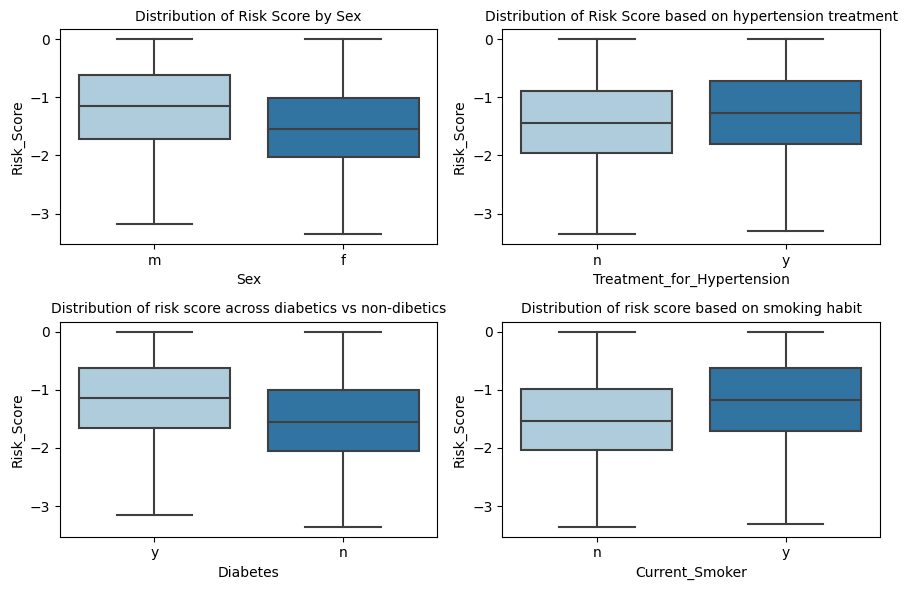

In [18]:
# plotting each categorical variables with respect to target
fig, axes=plt.subplots(2,2,figsize = (9,6))

sns.boxplot(x='Sex',y='Risk_Score',data=data,ax = axes[0,0])
axes[0,0].set_title('Distribution of Risk Score by Sex',fontsize=10)

sns.boxplot(x='Treatment_for_Hypertension',y='Risk_Score',data=data,ax=axes[0,1])
axes[0,1].set_title('Distribution of Risk Score based on hypertension treatment',fontsize=10)

sns.boxplot(x='Diabetes',y='Risk_Score',data=data,ax=axes[1,0])
axes[1,0].set_title("Distribution of risk score across diabetics vs non-dibetics",fontsize=10)

sns.boxplot(x='Current_Smoker',y='Risk_Score',data=data,ax=axes[1,1])
axes[1,1].set_title("Distribution of risk score based on smoking habit",fontsize=10)

fig.tight_layout()

Here, I have plotted each categorical variables against our target variable. Based on these boxplots, we can tell that:

   - Risk score is generally higher amongst males than female subjects in our dataset
   - Diabetics are at higher risk for developing heart condition compared to non-diabetics
   - Smokers have higher risk score than non-smokers
   - Those taking treatment for Hypertension have higher risk scores

HDL- high density lipoprotein aka the good cholesterol
TCL- Total cholesterol
**The total cholesterol to HDL cholesterol ratio** is better way to calculate cardiovascular risk. A high total cholesterol to HDL ratio indicates a higher risk for heart disease. Hence, I will create a new column called Cholesterol ratio such that Cholesterol ratio <- total cholesterol / HDL level  ;good ratio =3.5 : 1

In [19]:
data['Cholesterol_ratio']=data['TCL']/data['HDL']
data.head()

,Sex,Age,SBP(mmHg),Treatment_for_Hypertension,Current_Smoker,Diabetes,HDL,TCL,Risk_Score,Cholesterol_ratio
0,m,30,90,n,n,y,10,100,-2.439091,10.000000
1,m,31,95,y,y,n,15,115,-2.259489,7.666667
2,f,31,90,n,y,y,20,130,-2.598471,6.500000
3,f,32,95,y,y,n,25,145,-2.692763,5.800000
4,m,33,100,n,y,y,30,160,-2.108042,5.333333


# Correlation analysis

<Axes: >

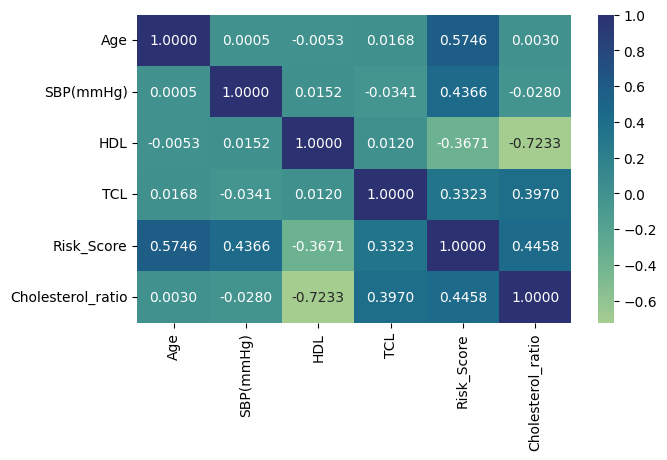

In [20]:
# looking into correlation between variables
plt.figure(figsize=(7,4))
sns.heatmap(data.corr(numeric_only=True), cmap="crest",annot=True,fmt=".4f")

 correlation coefficient ranges from -1 to +1
 Sign(+/-) indicate the direction and amount indicate the strength of correlation
'Age','SBP(mmHg)','TCL' are positively correlated to risk score while 'HDL' is negatively correlated.

In [21]:
# converting categorical variables to binary values
df=pd.get_dummies(data,drop_first=True,dtype=int)
df.head()

,Age,SBP(mmHg),HDL,TCL,Risk_Score,Cholesterol_ratio,Sex_m,Treatment_for_Hypertension_y,Current_Smoker_y,Diabetes_y
0,30,90,10,100,-2.439091,10.000000,1,0,0,1
1,31,95,15,115,-2.259489,7.666667,1,1,1,0
2,31,90,20,130,-2.598471,6.500000,0,0,1,1
3,32,95,25,145,-2.692763,5.800000,0,1,1,0
4,33,100,30,160,-2.108042,5.333333,1,0,1,1


In [22]:
y=df['Risk_Score'] ## target
not_y=df.drop(['Risk_Score'],axis=1) 

In [23]:
# feature selection
best_features =SelectKBest(score_func=f_regression,k=3)
fit=best_features.fit(not_y,y)

In [24]:
df_scores =pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(not_y.columns)

In [25]:
feature_Scores=pd.concat([df_columns,df_scores],axis=1)
feature_Scores.columns=['Features','Score']
feature_Scores.sort_values(by="Score",ascending=False)


,Features,Score
0,Age,4983.954068
4,Cholesterol_ratio,2506.804043
1,SBP(mmHg),2380.534551
2,HDL,1574.608543
3,TCL,1255.188566
8,Diabetes_y,687.412460
5,Sex_m,591.217236
7,Current_Smoker_y,540.472669
6,Treatment_for_Hypertension_y,116.204541


/home/riya/myvenv/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


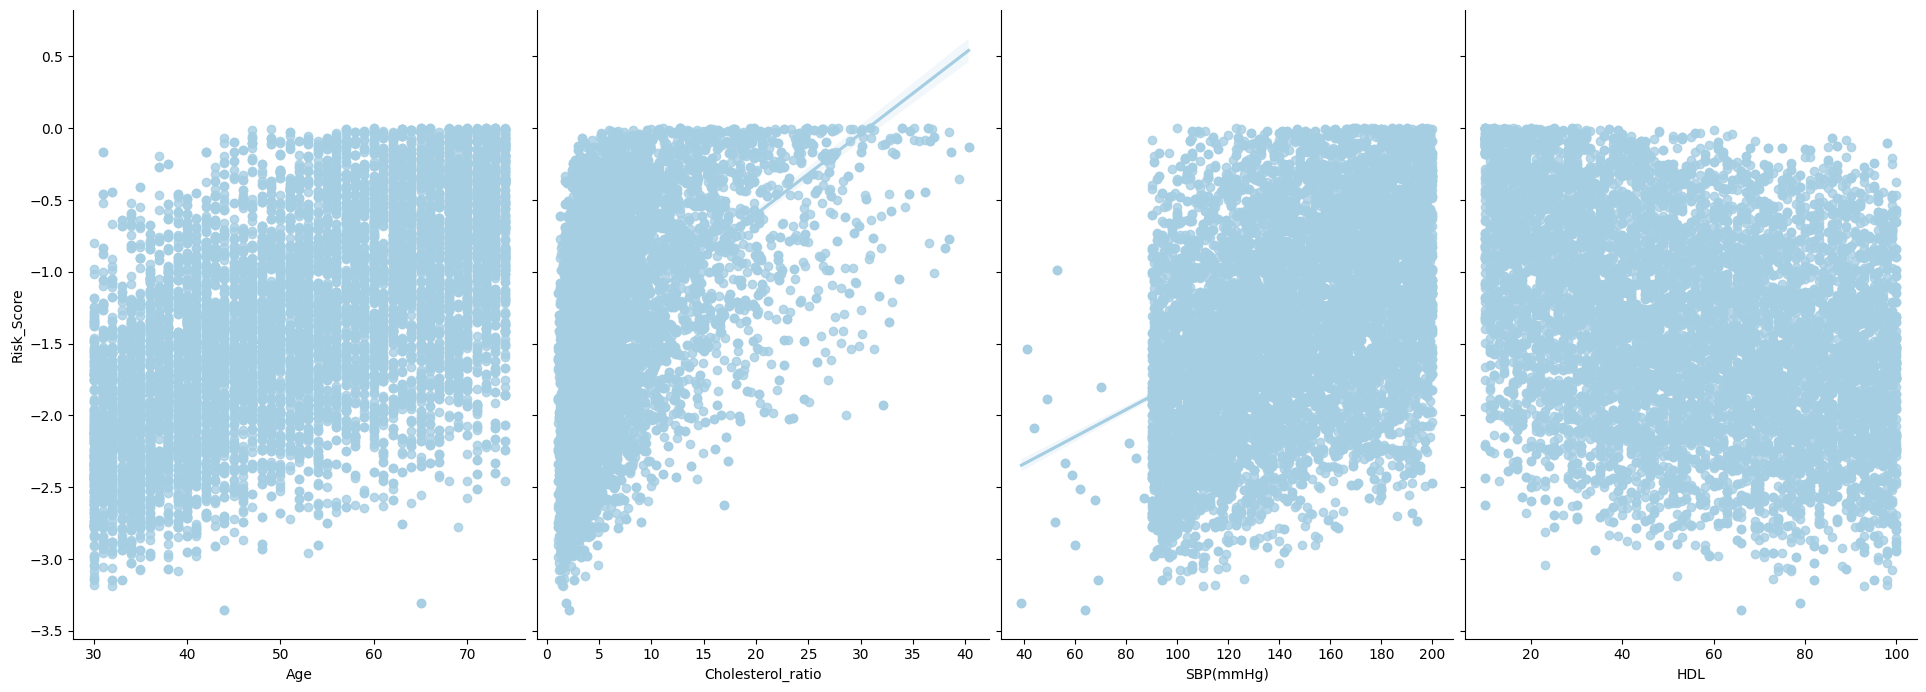

In [26]:
# visualising top features 
p = sns.pairplot(df, x_vars=['Age','Cholesterol_ratio','SBP(mmHg)',"HDL"], y_vars="Risk_Score",
                 kind="reg",
                size=7, aspect=0.7)

In [27]:
# split the data set
X=df[['Age',"SBP(mmHg)","Cholesterol_ratio","HDL","TCL","Diabetes_y","Sex_m"]]
Y=df['Risk_Score']
X.shape,Y.shape

((10111, 7), (10111,))

/tmp/ipykernel_20415/144419564.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Risk_Score'])


<Axes: xlabel='Risk_Score', ylabel='Density'>

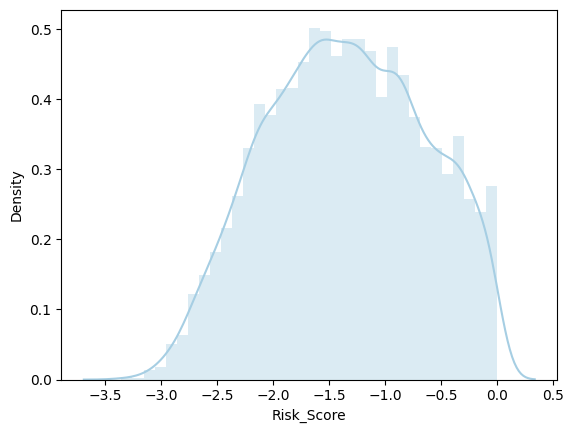

In [28]:
sns.distplot(df['Risk_Score'])

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,
                                               Y,
                                               test_size=0.3,
                                               random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7077, 7), (3034, 7), (7077,), (3034,))

In [30]:
# scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)

In [31]:
lr=LinearRegression()
# fit the model on training set
fitted_model=lr.fit(X_train_scaled,y_train)

In [32]:
print('Intercept:',fitted_model.intercept_)        
print('Coefficients:',fitted_model.coef_) 

Intercept: -1.353302713147426
Coefficients: [ 0.39550066  0.3158773   0.10251304 -0.19278548  0.20505499  0.17498992
  0.14695497]


In [33]:
pd.DataFrame(fitted_model.coef_.transpose(),index=X.columns,
             columns=['Coefficients']).sort_values("Coefficients",ascending=False)

,Coefficients
Age,0.395501
SBP(mmHg),0.315877
TCL,0.205055
Diabetes_y,0.174990
Sex_m,0.146955
Cholesterol_ratio,0.102513
HDL,-0.192785


In [34]:
# making predictions:
y_pred=lr.predict(X_test_scaled)

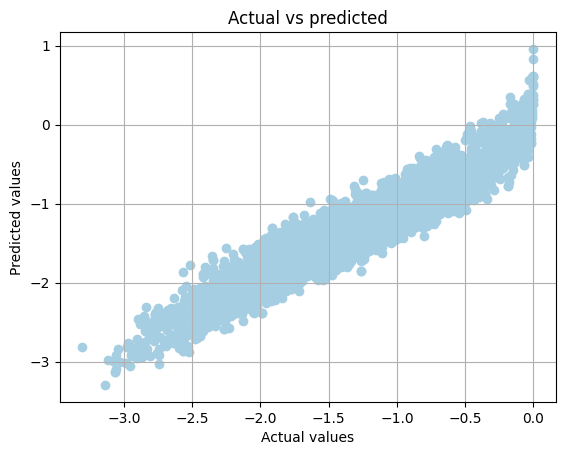

In [35]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs predicted")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.grid()

In [36]:
# evaluation metrics
r2=r2_score(y_test,y_pred)
mae = mean_absolute_error(y_pred,y_test) # mae measures how far the predictions are from the actual value, so lower the mae the better
mse = mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mean_absolute_error(y_pred,y_test))
print(f"Accuracy of model:{r2*100:.2f}%\nmean absolute score:{mae:.2f}\nmean squared error:{mse:.2f}\nroot mean squared error:{rmse:.2f}")

Accuracy of model:88.85%
mean absolute score:0.20
mean squared error:0.06
root mean squared error:0.44


In [37]:
# calculating adjusted r2 score--It accounts for model complexity 
#and is useful when comparing models with different numbers of features.
n=len(Y)
k=X.shape[1]
# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print(f"Adjusted R2 score:{adjusted_r_squared:.2f}")

Adjusted R2 score:0.89


# Residual plot
Essentially, what this means is that if we capture all of the predictive information, all that is left behind (residuals) should be completely random & unpredictable i.e stochastic. Hence, we want our residuals to follow a normal distribution. 

A few characteristics of a good residual plot are as follows:

- It has a high density of points close to the origin and a low density of points away from the origin
- It is symmetric about the origin

Mean of Residuals -0.004955958012221056


Text(0.5, 0, 'residuals')

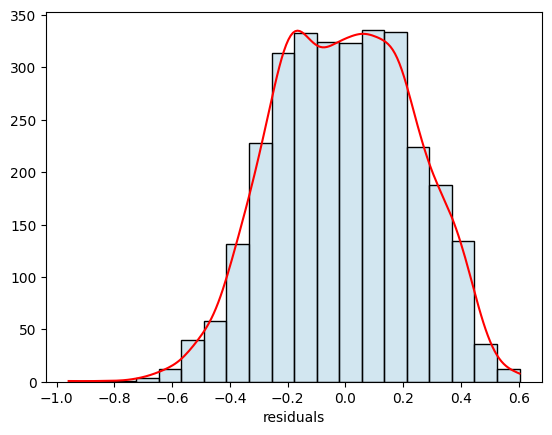

In [38]:
residuals=y_test-y_pred
mean_residuals=np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
# visualising for normality of residuals
ax=sns.histplot(residuals,bins=20,kde=True)
ax.get_lines()[0].set_color('r')
ax.set_ylabel(None)
ax.set_xlabel("residuals")

Homoskedasticity is another key assumption of linear regression where the spread (or variability) of the residuals remains constant across all levels of independent variables. We can visualise this by plotting residuals on y-axis and our independent variables on x-axis

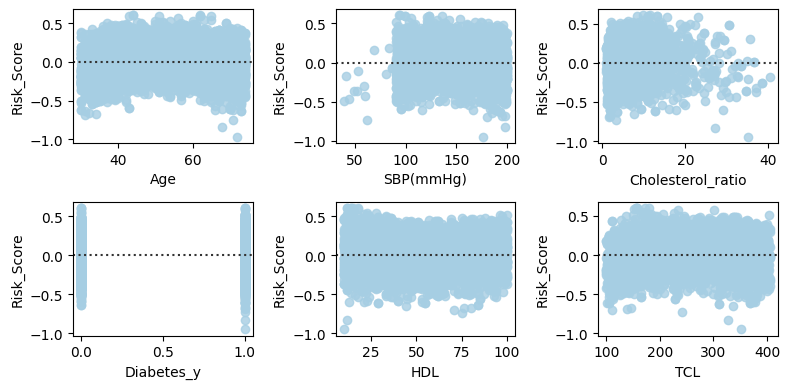

In [39]:
# checking for
fig,axes=plt.subplots(2,3,figsize=(8,4))
sns.residplot(x=x_test["Age"], y=residuals,ax=axes[0,0])
sns.residplot(x=x_test["SBP(mmHg)"], y=residuals,ax=axes[0,1])
sns.residplot(x=x_test["Diabetes_y"], y=residuals,ax=axes[1,0])
sns.residplot(x=x_test["HDL"], y=residuals,ax=axes[1,1])
sns.residplot(x=x_test["Cholesterol_ratio"], y=residuals,ax=axes[0,2])
sns.residplot(x=x_test["TCL"], y=residuals,ax=axes[1,2])


plt.tight_layout()